In [2]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 13

### Load data and visualize it 

In [3]:
dname="DATA"; fname=dname+'/x_RBM_2024_lesson.dat'

# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference = 2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

each of N=10000 data has L=12 digits
[0 0 1 1 0 0 1 0 0 0 1 1]
[0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 0 0 1 0 0 0 0 1 0 0]
[0 0 1 1 0 1 1 1 1 0 0 0]
[1 0 1 0 1 1 1 1 1 1 0 0]
[0 0 1 0 1 1 0 0 1 1 0 0]
[1 1 1 0 0 0 1 1 0 1 1 1]
[1 1 1 1 0 0 1 0 1 1 0 0]
[1 1 0 0 0 0 1 1 0 0 1 1]
[1 1 1 0 1 1 0 0 1 0 0 0]
[0 0 0 1 0 1 0 0 0 0 1 1]
[1 1 1 1 1 1 0 1 1 1 0 0]
...


In [4]:
from IPython.display import display_html 
import pandas as pd

def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: white;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(v[:N1])
df0s = df0.style.set_table_attributes("style='display:inline'")
df0s.map(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)

display_html(df0s._repr_html_(), raw=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,1,1,0,0,1,0,0,0,1,1
1,0,0,1,1,0,0,0,1,0,0,0,0
2,1,1,0,0,1,0,0,0,0,1,0,0
3,0,0,1,1,0,1,1,1,1,0,0,0
4,1,0,1,0,1,1,1,1,1,1,0,0
5,0,0,1,0,1,1,0,0,1,1,0,0
6,1,1,1,0,0,0,1,1,0,1,1,1
7,1,1,1,1,0,0,1,0,1,1,0,0
8,1,1,0,0,0,0,1,1,0,0,1,1
9,1,1,1,0,1,1,0,0,1,0,0,0


## Plotting
Functions to plot the model in different epochs 

In [79]:
def create_coord(M,np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(a,b,w,epoch=0):
    M = len(b)
    (x1,y1)=create_coord(M,L,0)
    (x2,y2)=create_coord(M,M,1,f=0.7)
    
    fig, ax = plt.subplots(1,1 , figsize=(7, 3.3))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=300.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.51,0.85,"hidden\nlayer")
    plt.show()

def plot_likelihood(likelihood):
    epochs = len(likelihood)
    plt.plot(list(range(epochs)), likelihood)
    plt.xlabel('t [epoch]')
    plt.ylabel('loglikelihood')

### Activation function with sigmoid


In [13]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 0
activate(v[k],w,b,GAP,info=True)

input= [0 0 1 1 0 0 1 0 0 0 1 1]
act= [ 0.22414925 -0.43457205 -1.48569002]
prob= [0.55580386 0.3930351  0.18456951]
output= [0 1 1]


array([0, 1, 1])

## Train RBM model


In [19]:
import itertools as it

def boltzmann(v, h, W, a, b):
    energy = - np.dot(a, v) - np.dot(b, h) - np.dot(v, np.dot(W, h))
    return np.exp(-energy)

def loglh(v_data, W, a, b):
    N_v, N_h = len(v_data[0]), len(b)
    v_conf = [list(v) for v in list(it.product((0,1), repeat=N_v))] #all v configs
    h_conf = [list(h) for h in list(it.product((0,1), repeat=N_h))] #all h configs
    E = np.mean([-np.log(np.sum([boltzmann(v, h, W, a, b) for h in h_conf])) for v in v_data])
    Z = np.sum([boltzmann(v, h, W, a, b) for h in h_conf for v in v_conf])
    return -E-np.log(Z)


In [65]:
np.random.seed(12345)

def train_RBM(l_rate = 1.0, CD=1, epochs=100, M=3, show=True):

    # range of each initial weight 
    sigma = sqrt(4. / float(L + M))
    # initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
    w = sigma * np.random.randn(L,M)
    a = sigma * np.random.randn(L)
    b = np.zeros(M)
    w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

    # plot graph of the first epoch
    plotgraph(a,b,w,0)

    # list to store the likelihood of each epoch
    likelihood = []

    # minibatch
    mini, m = 500, 0

    print('===================================================')
    for epoch in range(epochs):
        likelihood.append(loglh(v, w, a, b))
        # aggregate normalization of batch statistics and learning rate in l_rate_m
        l_rate_m = l_rate / mini
        for k in range(N):
            if m==0:
                # initialize averages in miniblock
                v_data, v_model = np.zeros(L),np.zeros(L)
                h_data, h_model = np.zeros(M),np.zeros(M)
                vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))
                
            # positive CD phase: generating h
            h = activate(v[k],w,b,GAP)
            # negative CD phase: generating fantasy vf
            vf = activate(h,w.T,a,GAP)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf,w,b,GAP)

            ##### ADDED FOR CD-N ##########
            for i in range(1, CD):
                vf = activate(hf,w.T,a,GAP)
                hf = activate(vf,w,b,GAP)

            v_data  += v[k]
            v_model += vf
            h_data  += h
            h_model += hf
            vh_data += np.outer(v[k].T,h)
            vh_model+= np.outer(vf.T,hf)

            m += 1
            # minibatch
            if m==mini:
                # gradient of the likelihood: follow it along its positive direction
                # with a "vanilla" SGD
                dw = l_rate_m*(vh_data - vh_model)
                da = l_rate_m*(v_data - v_model)
                db = l_rate_m*(h_data - h_model)
                if epoch<=1 and k<=mini and show==True:
                    print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                    print('dw =',dw)
                    print('da =',da)
                    print('db =',db)
                # basic step of vanilla gradient descent, from eq.(211)
                w = w + dw
                a = a + da
                b = b + db
                m=0

        # randomize the order of input data
        np.random.shuffle(v)
        # decrease the learning rate (here as a power law)
        l_rate = l_rate / (0.01 * l_rate + 1)
        if epoch%10==9 and show==True:
            plotgraph(a,b,w,epoch+1)
            print('l_rate = ',l_rate)
            print('----------- loglikelihood= ', likelihood[-1])
    
    if show==False:
        plotgraph(a,b,w,epochs)
    return (a,b,w,a0,b0,w0,likelihood)
    

-----------------------------------

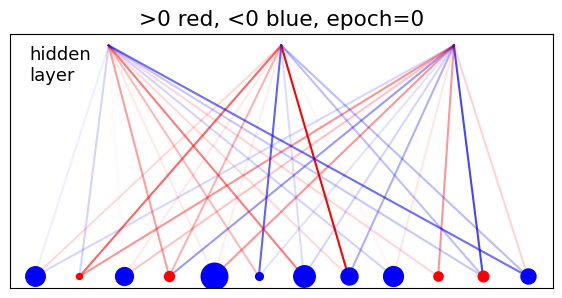

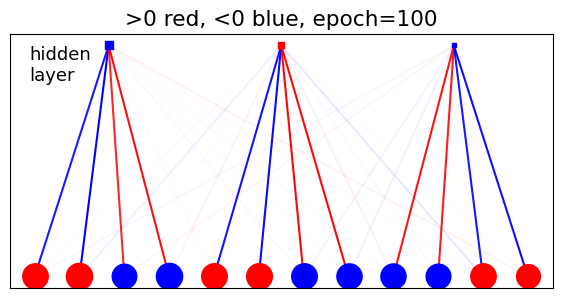

In [66]:
# RBM using M=3, CD-1 and epochs=100
a,b,w,a0,b0,w0,likelihood = train_RBM(show=False)

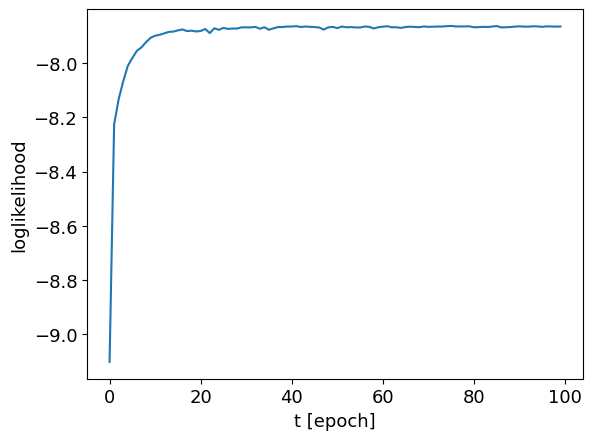

In [67]:
# let's plot the loglikelihood
plot_likelihood(likelihood)

Let's increase the number of contrastive divergence steps from n=1 to n=5

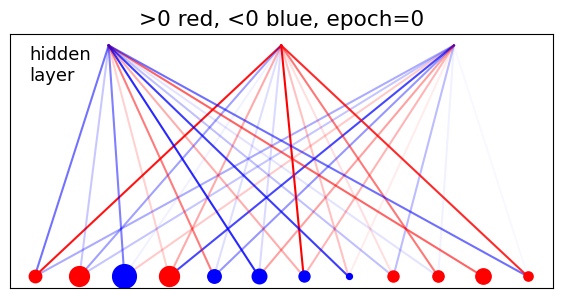

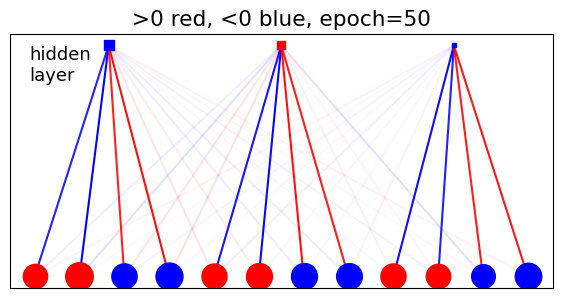

In [68]:
# RBM using M=3, CD-5 and 50 epochs
a,b,w,a0,b0,w0,likelihood = train_RBM(CD=5, epochs=50, show=False)

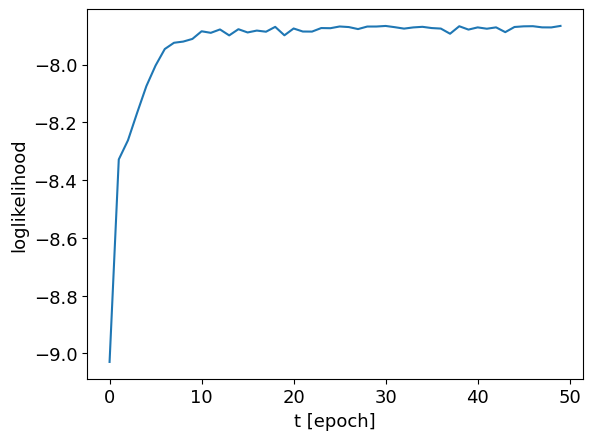

In [69]:
plot_likelihood(likelihood)

---------------------------------
Let's try RBMs with different numbers of hidden units: M=2, 3 (done above), 4, 5, and 6

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1]


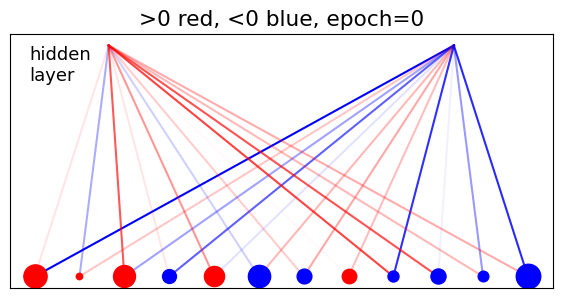

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1]


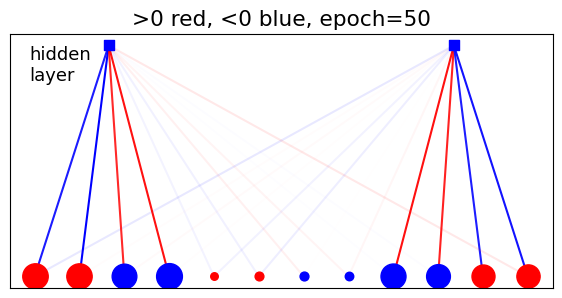

In [90]:
_,_,_,_,_,_,_ = train_RBM(CD=1, epochs=50, M=2, show=False)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1]


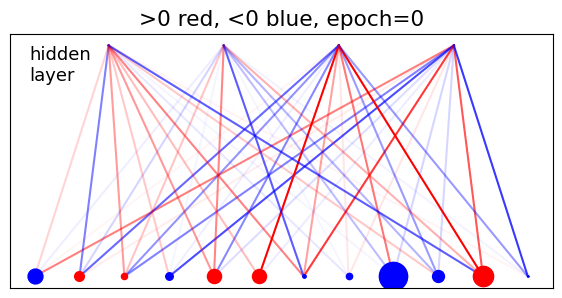

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1]


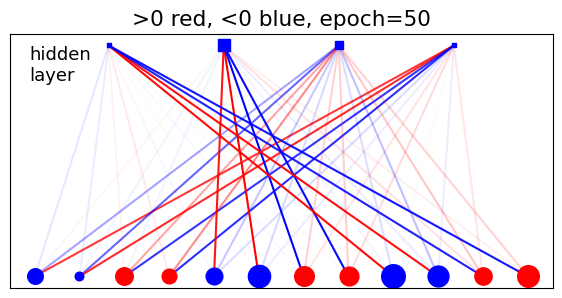

In [91]:
_,_,_,_,_,_,_ = train_RBM(CD=1, epochs=50, show=False, M=4)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


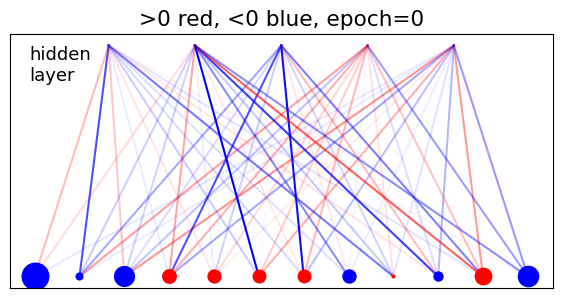

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


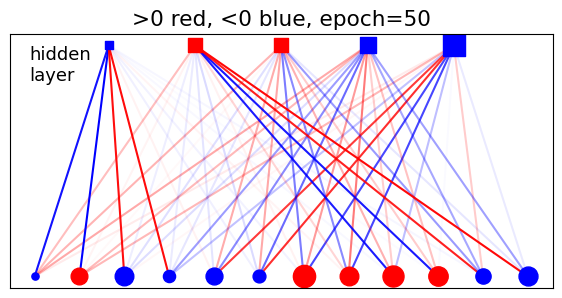

In [92]:
_,_,_,_,_,_,_ = train_RBM(CD=1, epochs=50, show=False, M=5)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


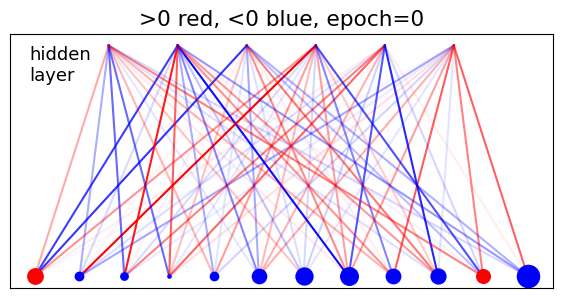

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


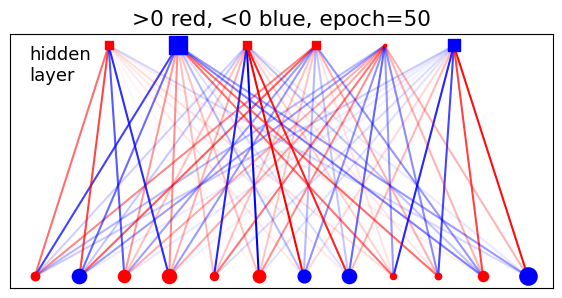

In [89]:
_,_,_,_,_,_,_ = train_RBM(CD=1, epochs=50, show=False, M=6)

---------------------------------
From the weights learned by the RBM, guess the structure of the data

--------------------------------

## Test: noise reduction

In [ ]:
from IPython.display import display_html 
import pandas as pd

ampl=40.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)
    
# difference between fantasy and data
diff = (v1 - v0)/2
str0 = fname+'_M'+str(M)+'-mini'+str(mini)
np.savetxt(str0+".fantasy", (v1+1)/2, fmt='%d',delimiter=' ')  
np.savetxt(str0+'.diff', diff, fmt='%d',delimiter=' ')  

N1=12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)